In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import numpy as np
import math
import pandas as pd
import os
from copy import deepcopy
from time import time

In [3]:
import sys
sys.path.insert(0, '/Users/karlhajjar/Documents/projects/wide-networks/')

import utils
from utils.plot.initialization.training import generate_test_results
from utils.plot.initialization.graphs import *
from utils.plot import set_plot_fonts
from utils.tools import set_random_seeds

# Constants

In [4]:
sigma = nn.ReLU()
bias = False
d = 50  # dimension of the input data
n = int(1e4)  # number of training samples considered
n_test = int(1e2)  # number of test samples considered

Ms = [50, 100, 500, 1000, 2000, 5000] #, 1000, 2000]  # , 5000, 8000
n_trials = 1
L = 4  # 5

x = 2 * torch.rand((n,d))
y = x.mean(axis=1)  # target for each sample is the mean over the d dimensions of the values of the components

x_test = 2 * torch.rand((n_test, d))
y_test = x_test.mean(axis=1)

batch_size = 256
opt = 'sgd'
lr = 1.0e-2
opt_params = {'lr': lr}
steps = int(1.0e3)


average = False
norm = 'inf'

figsize = (11,8)

# set the figure directory for the notebook
figures_dir = '/Users/karlhajjar/Documents/projects/wide-networks/figures/initialization/standard-training-no-bias/'
utils.plot.initialization.graphs.figures_dir = figures_dir

In [5]:
fonts_map = {'axes': {'titlesize': 20, 'labelsize': 18},
             'xtick': {'labelsize': 18},
             'ytick': {'labelsize': 18},
             'legend': {'fontsize': 16}}

set_plot_fonts(fonts_map)
sns.set_palette("deep")

In [6]:
set_random_seeds()

# 1. Glorot init without any scaling

In [7]:
scaling = None
init = 'glorot_uniform'
init_params = {'gain': 1.0}
scale_init = None

In [8]:
start = time()
dists_to_init_per_step, test_losses_per_step, grads_per_step = \
    generate_test_results(L, Ms, d, opt, opt_params, init, init_params, n_trials, x, y, x_test, y_test, 
                          batch_size=batch_size, steps=steps, bias=bias, scaling=scaling, scale_init=scale_init,
                          average=average, norm=norm)
end = time()
print('Time to compute all results : {:.2f} minutes'.format((end - start) / 60))

Time to compute all results : 25.00 minutes


In [9]:
grads_df = get_all_grads_df(grads_per_step)
test_losses_df = get_all_test_losses_df(test_losses_per_step)
dist_to_init_df = get_all_dist_to_init_df(dists_to_init_per_step)

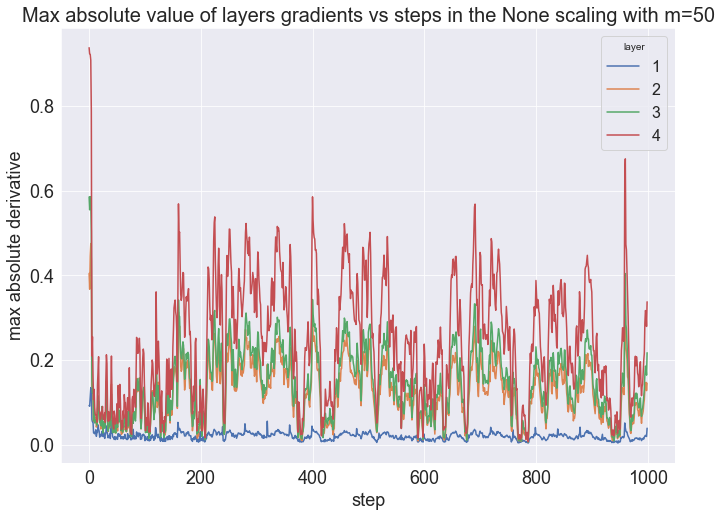

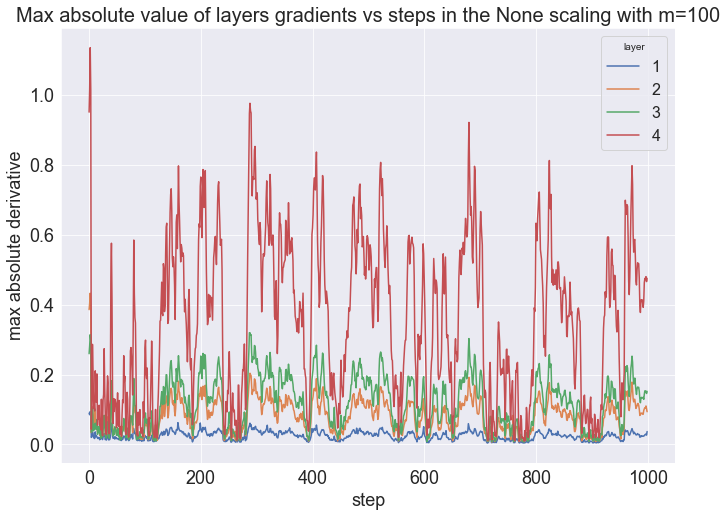

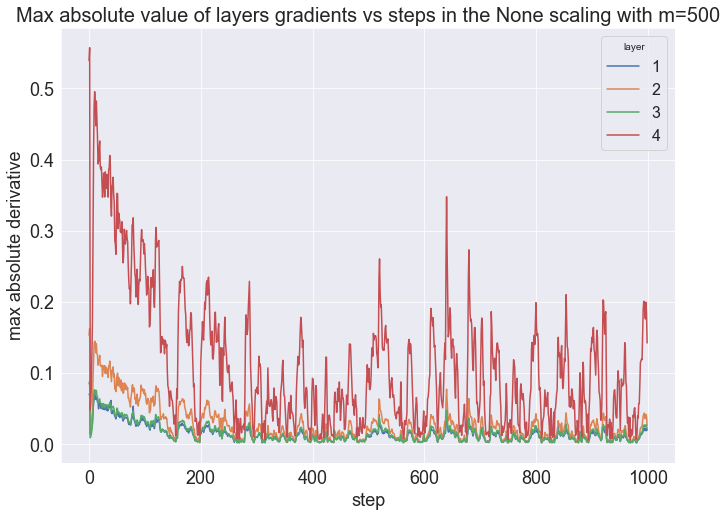

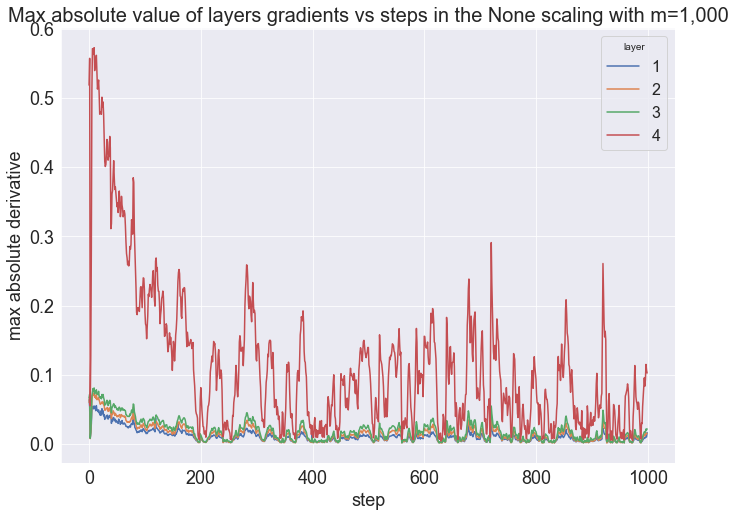

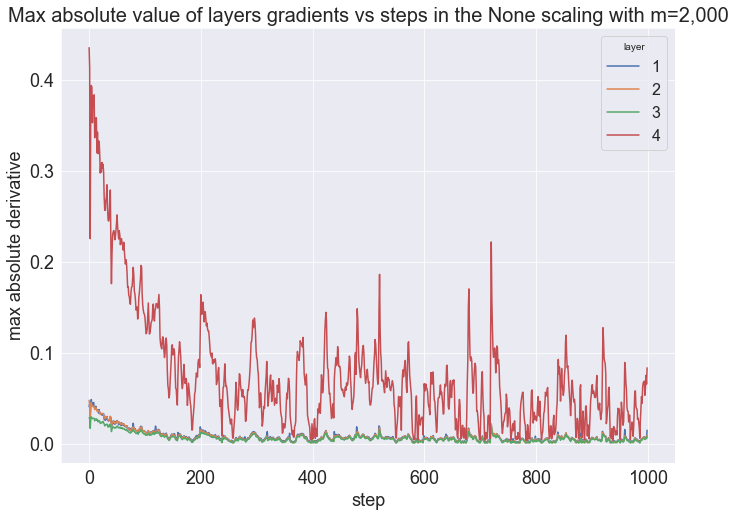

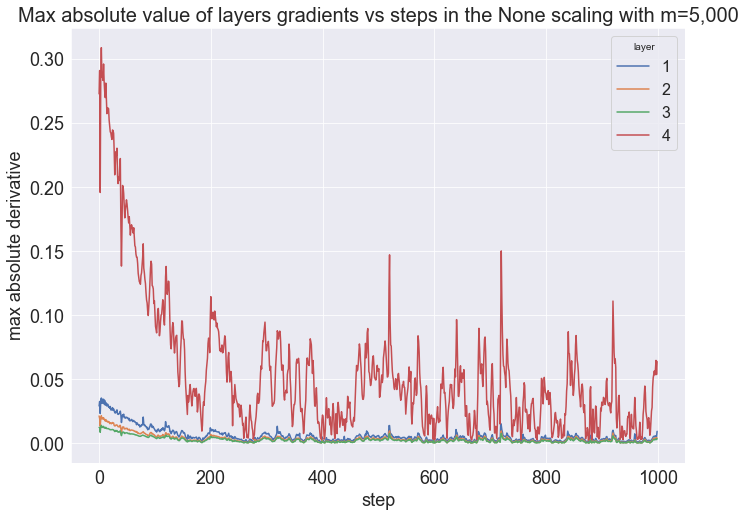

In [10]:
plot_gradients_vs_step(grads_df, L, figsize, init, scaling, scale_init, save=True)

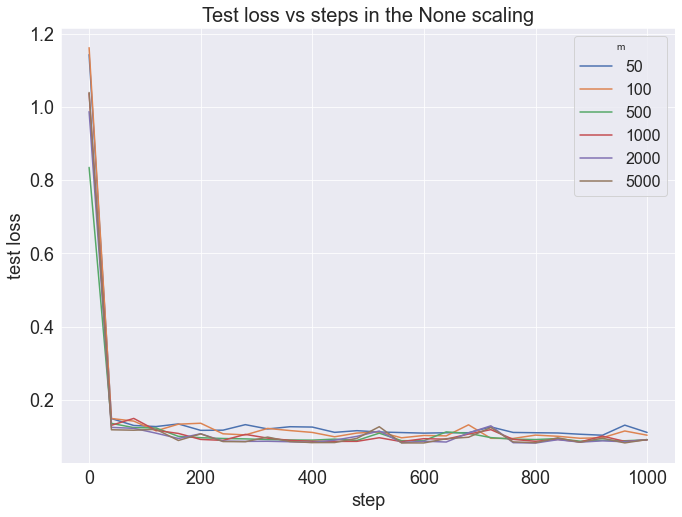

In [11]:
plot_test_losses_vs_step(test_losses_df, L, figsize, init, scaling, scale_init, save=True)

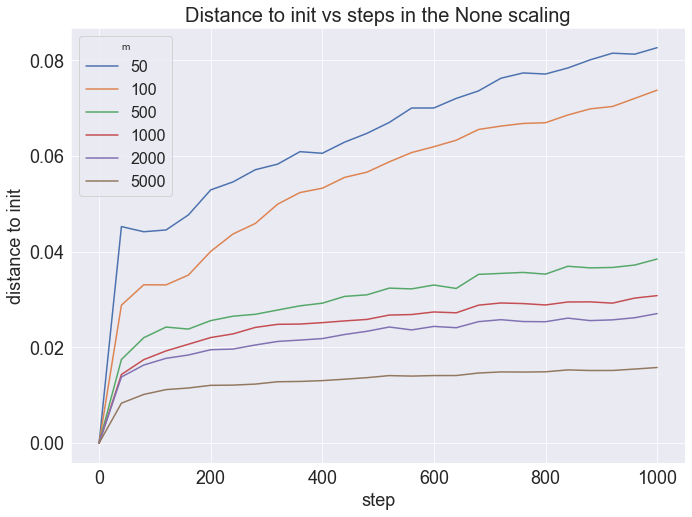

In [12]:
plot_dists_to_init_vs_step(dist_to_init_df, L, figsize, init, scaling, scale_init, save=True)

# 2. He fan_in init without any scaling

In [32]:
scaling = None
init = 'he_uniform'
fan_mode = 'fan_in'
init_params = {'a': 0, 'mode': fan_mode, 'nonlinearity': 'relu'}
scale_init = None

In [33]:
start = time()
dists_to_init_per_step, test_losses_per_step, grads_per_step = \
    generate_test_results(L, Ms, d, opt, opt_params, init, init_params, n_trials, x, y, x_test, y_test, 
                          batch_size=batch_size, steps=steps, bias=bias, scaling=scaling, scale_init=scale_init,
                          average=average, norm=norm)
end = time()
print('Time to compute all results : {:.2f} minutes'.format((end - start) / 60))

Time to compute all results : 169.73 minutes


In [34]:
grads_df = get_all_grads_df(grads_per_step)
test_losses_df = get_all_test_losses_df(test_losses_per_step)
dist_to_init_df = get_all_dist_to_init_df(dists_to_init_per_step)

In [38]:
after_init_grads = grads_df.loc[grads_df.step > 0, :]

In [41]:
prefix

'post_init-fan_in'

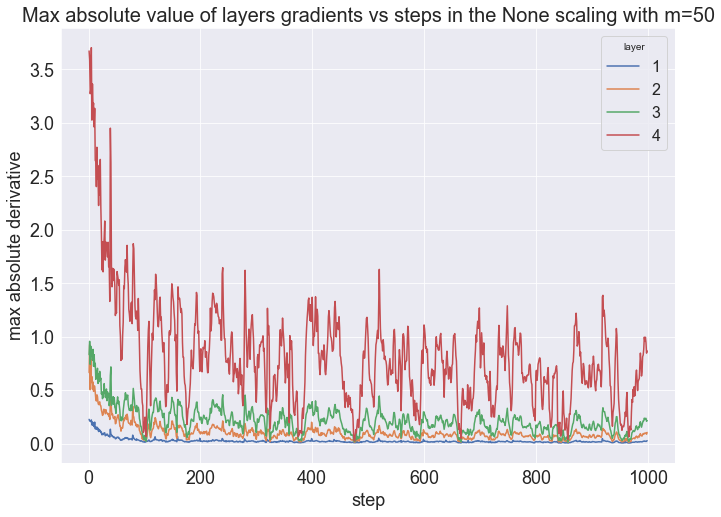

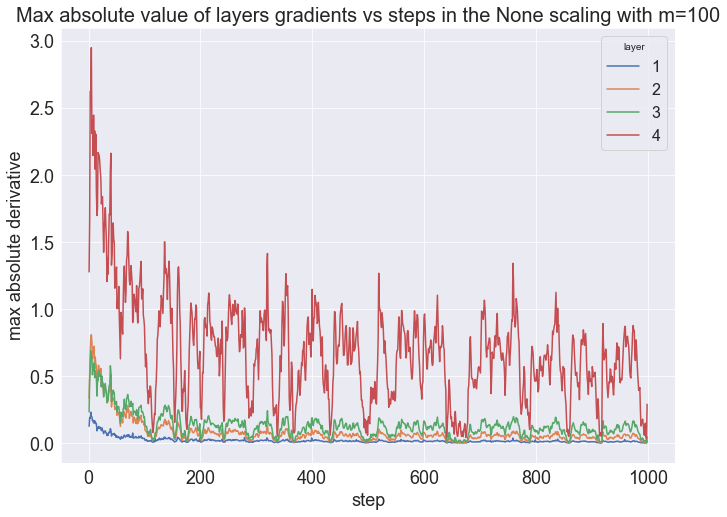

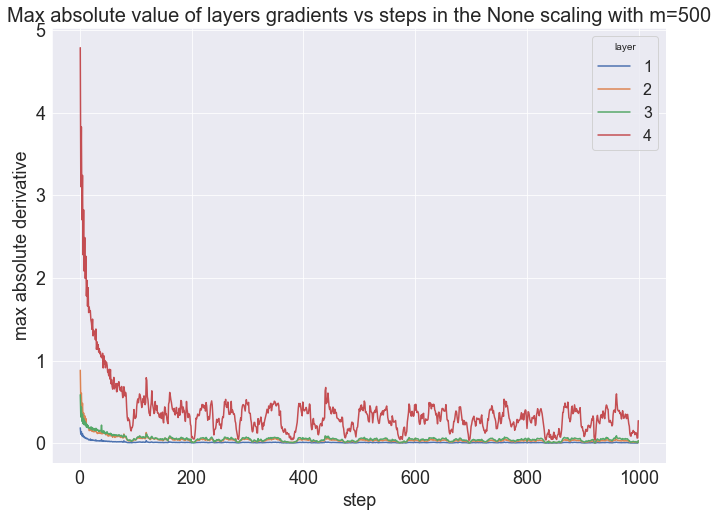

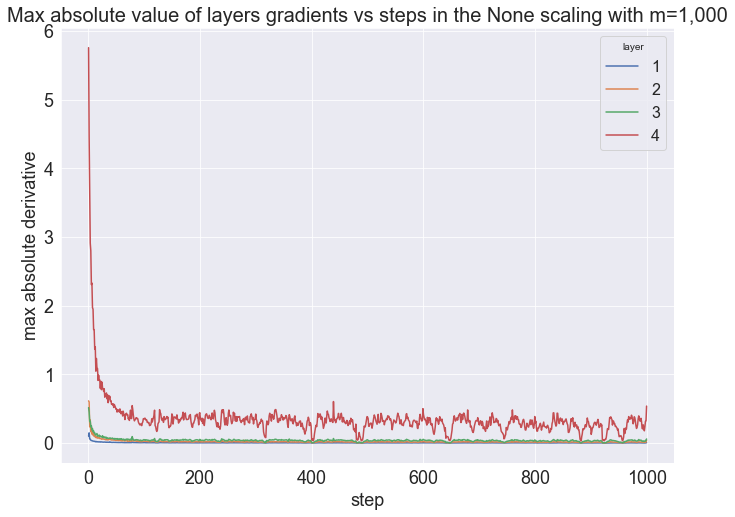

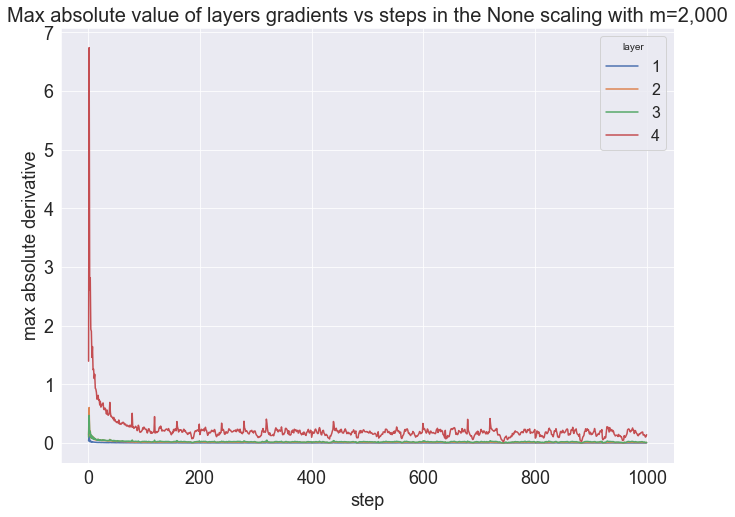

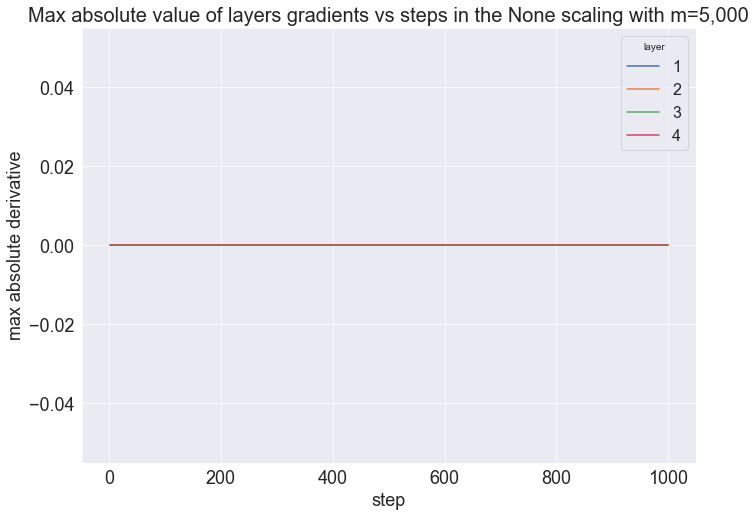

In [42]:
prefix = 'post_init-' + fan_mode
plot_gradients_vs_step(after_init_grads, L, figsize, init, scaling, scale_init, save=True, prefix=prefix)

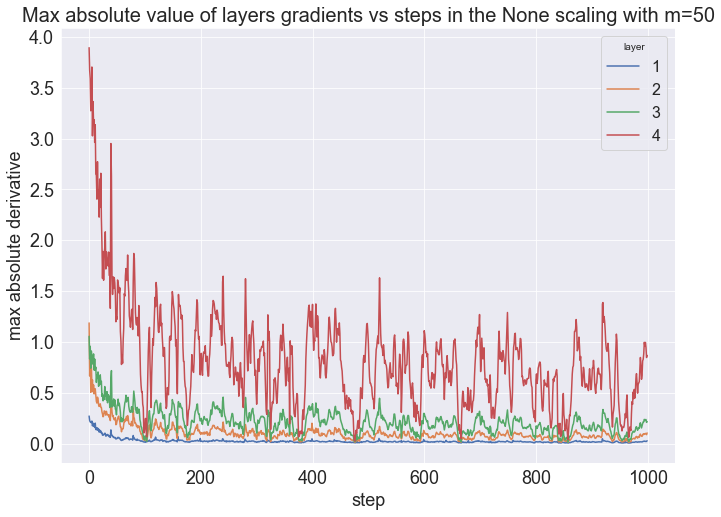

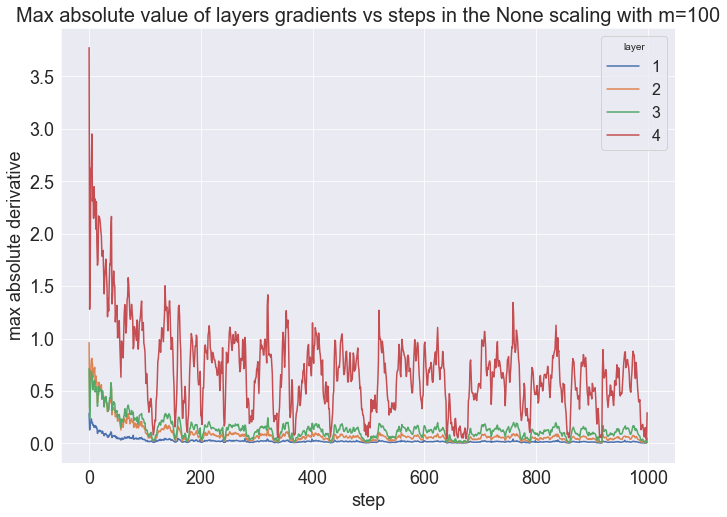

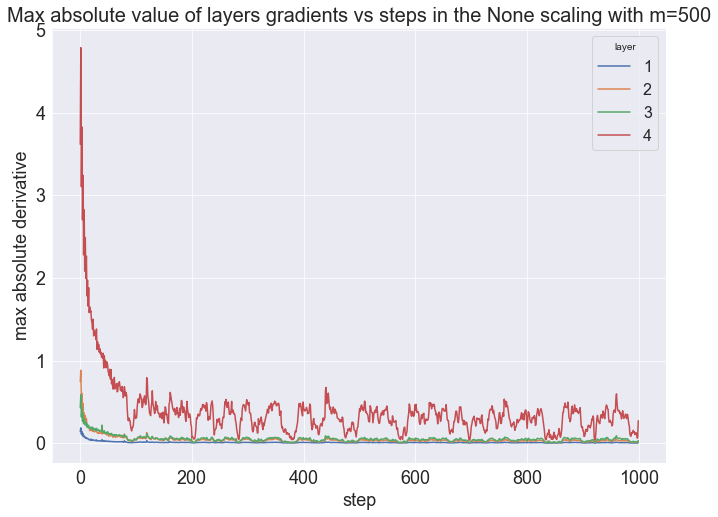

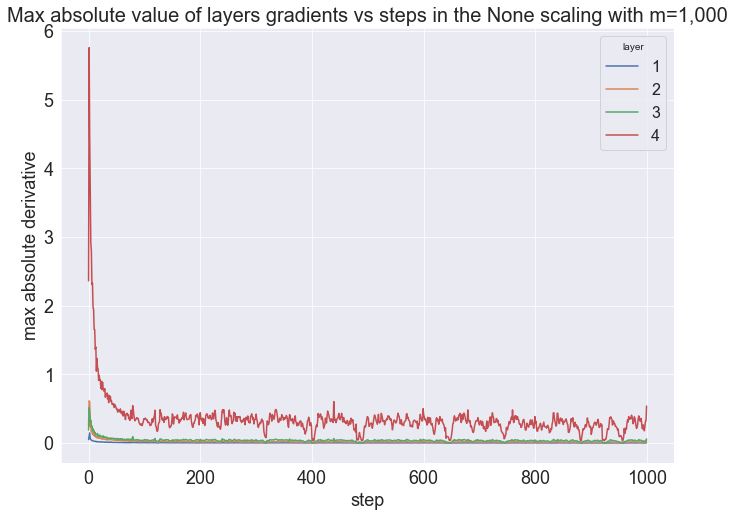

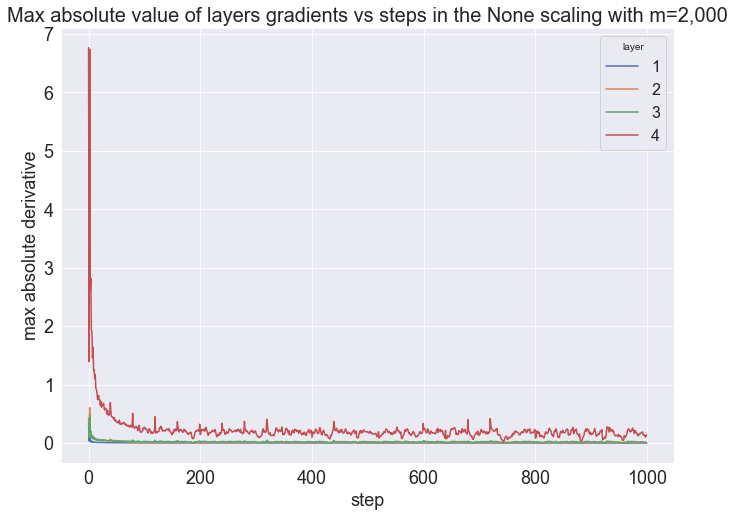

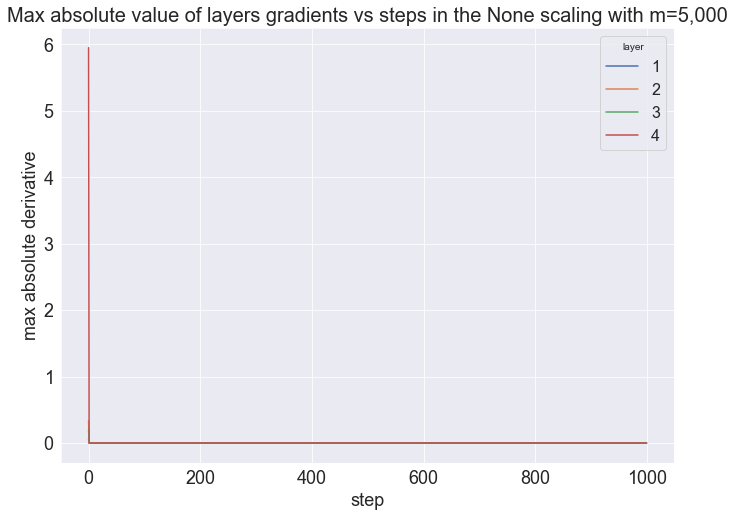

In [35]:
plot_gradients_vs_step(grads_df, L, figsize, init, scaling, scale_init, save=True, prefix=fan_mode)

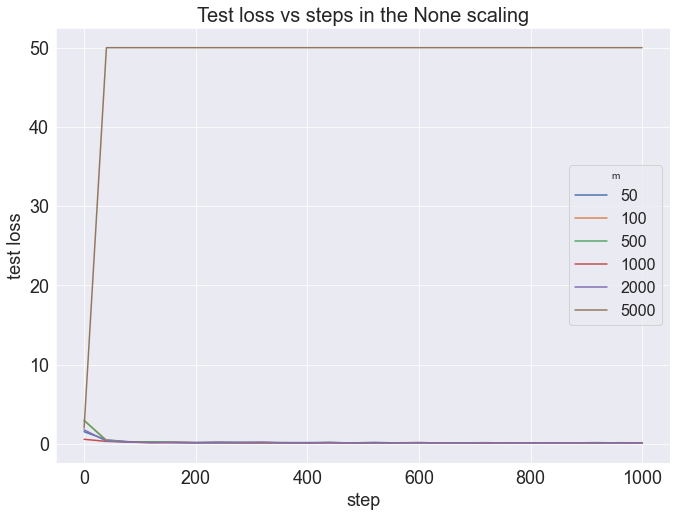

In [36]:
plot_test_losses_vs_step(test_losses_df, L, figsize, init, scaling, scale_init, save=True, prefix=fan_mode)

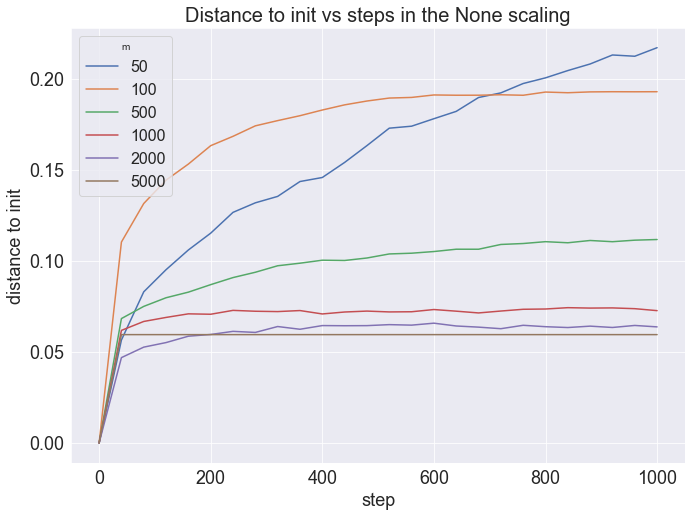

In [37]:
plot_dists_to_init_vs_step(dist_to_init_df, L, figsize, init, scaling, scale_init, save=True, prefix=fan_mode)

# 3. He fan_out init without any scaling

In [43]:
scaling = None
init = 'he_uniform'
fan_mode = 'fan_out'
init_params = {'a': 0, 'mode': fan_mode, 'nonlinearity': 'relu'}
scale_init = None

In [44]:
start = time()
dists_to_init_per_step, test_losses_per_step, grads_per_step = \
    generate_test_results(L, Ms, d, opt, opt_params, init, init_params, n_trials, x, y, x_test, y_test, 
                          batch_size=batch_size, steps=steps, bias=bias, scaling=scaling, scale_init=scale_init,
                          average=average, norm=norm)
end = time()
print('Time to compute all results : {:.2f} minutes'.format((end - start) / 60))

Time to compute all results : 24.37 minutes


In [21]:
grads_df = get_all_grads_df(grads_per_step)
test_losses_df = get_all_test_losses_df(test_losses_per_step)
dist_to_init_df = get_all_dist_to_init_df(dists_to_init_per_step)

In [ ]:
after_init_grads = grads_df.loc[grads_df.step > 0, :]

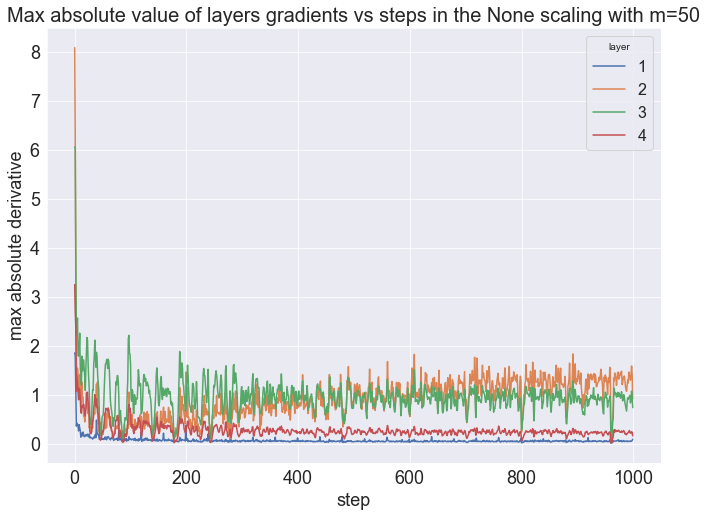

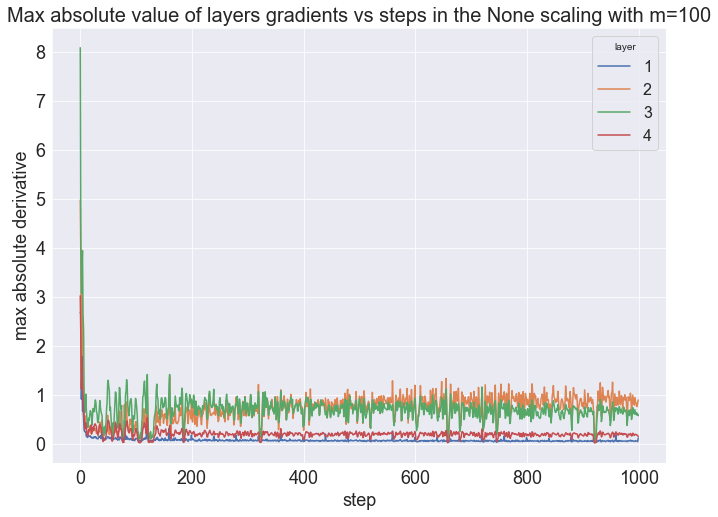

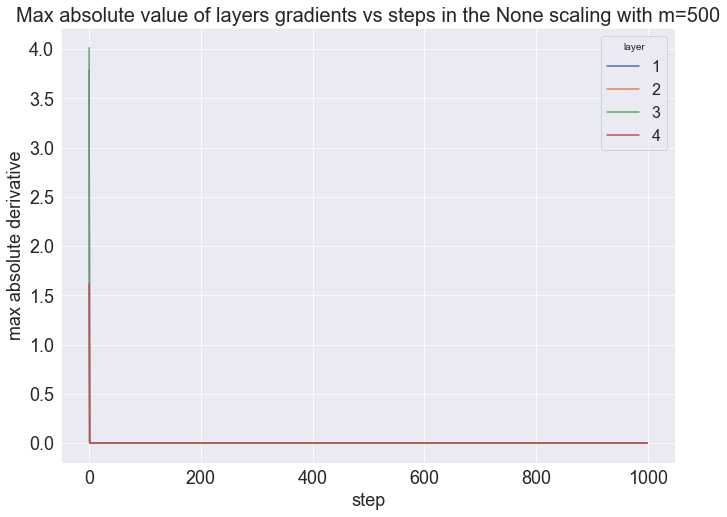

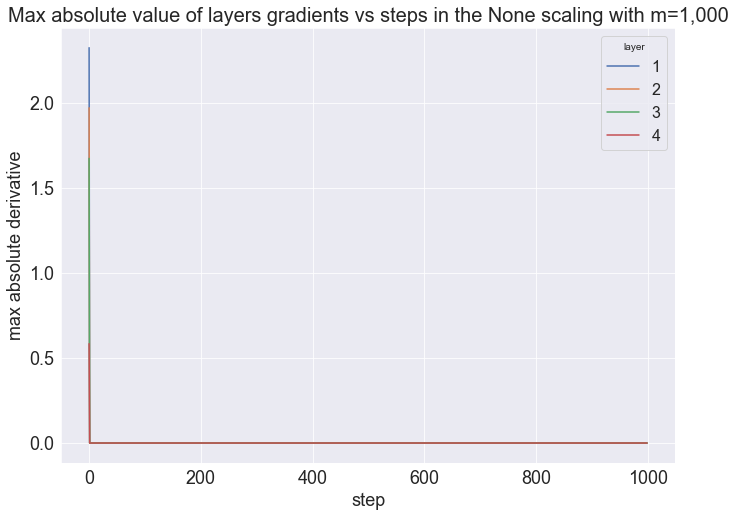

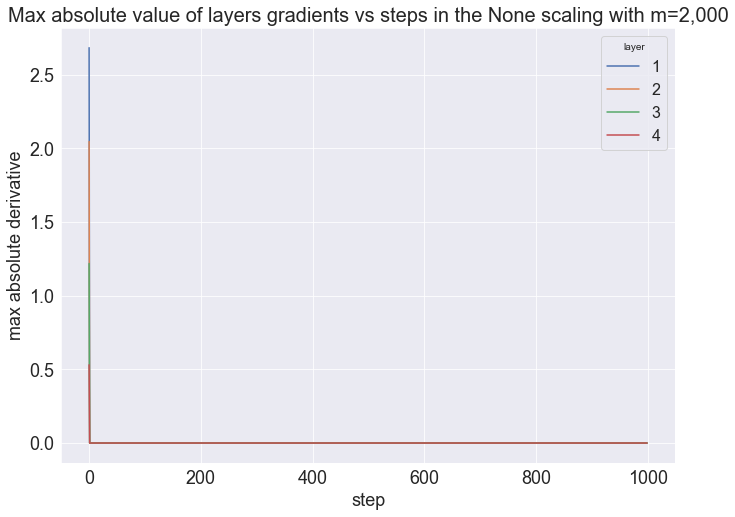

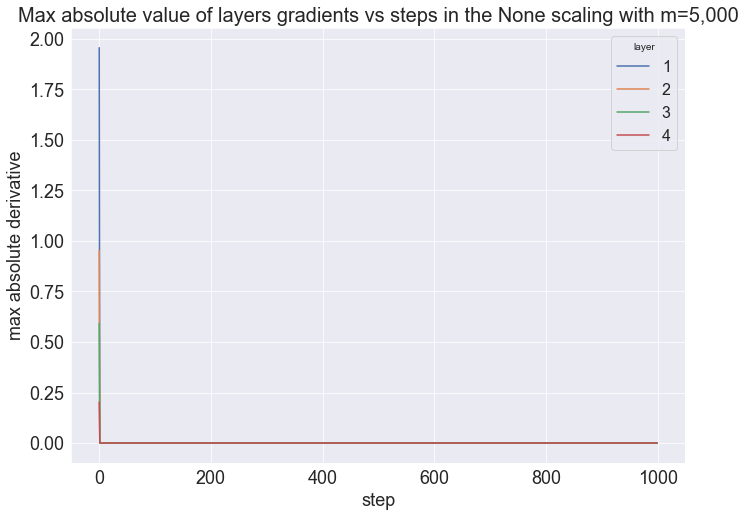

In [22]:
plot_gradients_vs_step(grads_df, L, figsize, init, scaling, scale_init, save=True, prefix=fan_mode)

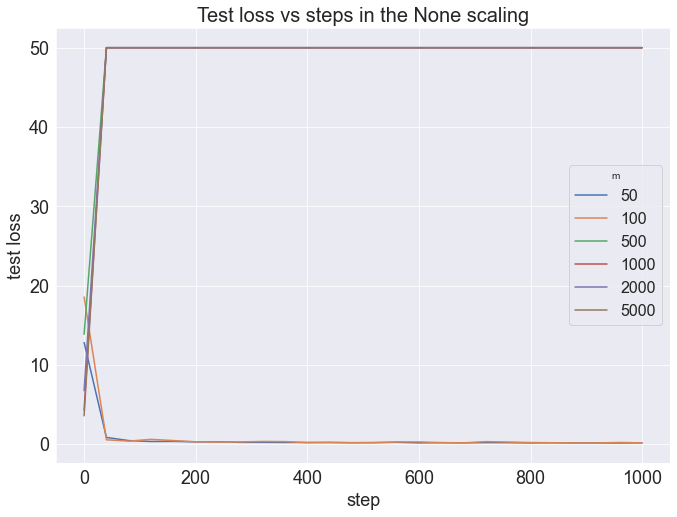

In [30]:
plot_test_losses_vs_step(test_losses_df, L, figsize, init, scaling, scale_init, save=True, prefix=fan_mode)

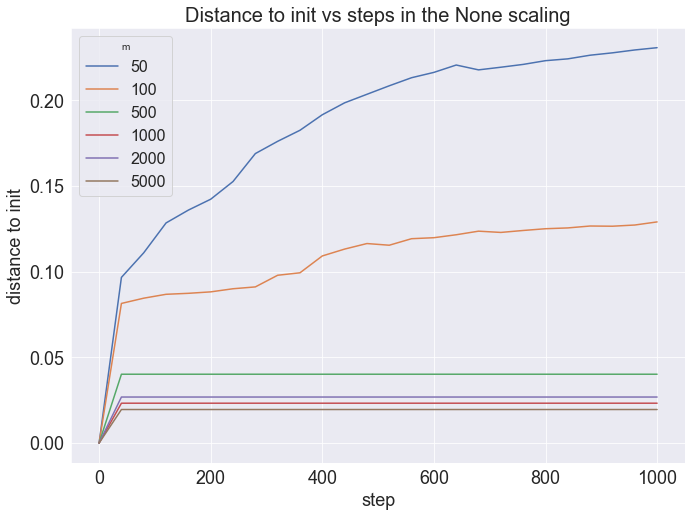

In [31]:
plot_dists_to_init_vs_step(dist_to_init_df, L, figsize, init, scaling, scale_init, save=True, prefix=fan_mode)